[[0.83921569 0.83921569 0.84313725 0.84705882 0.83529412 0.82745098
  0.81960784 0.82745098 0.83921569 0.85490196 0.8627451  0.86666667
  0.86666667 0.87058824 0.8745098  0.87058824 0.85490196 0.83529412
  0.83529412 0.83921569]
 [0.83921569 0.83921569 0.84313725 0.84313725 0.83137255 0.82352941
  0.81960784 0.82352941 0.83529412 0.85098039 0.85882353 0.86666667
  0.87058824 0.87058824 0.86666667 0.85882353 0.84705882 0.83921569
  0.83921569 0.84313725]
 [0.84313725 0.84313725 0.84313725 0.84313725 0.83137255 0.82352941
  0.81960784 0.82352941 0.83137255 0.83921569 0.84705882 0.8627451
  0.87058824 0.8745098  0.85882353 0.84313725 0.83529412 0.83529412
  0.84705882 0.85098039]
 [0.83529412 0.83529412 0.83529412 0.83921569 0.83529412 0.83137255
  0.82745098 0.82745098 0.83137255 0.83137255 0.83921569 0.85490196
  0.87058824 0.87843137 0.85882353 0.83921569 0.82745098 0.83137255
  0.84313725 0.85098039]
 [0.82352941 0.83137255 0.83137255 0.83921569 0.83921569 0.83529412
  0.83529412 0.83

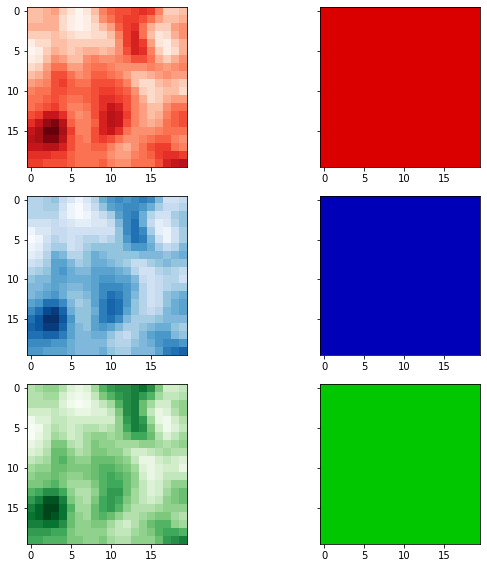

In [10]:
from skimage import io, img_as_float, filters, morphology, img_as_ubyte
import numpy as np
import os
import matplotlib.pyplot as plt

base_dir = 'Dataset/consumer'
filename = '!1N5H-IOHNZWDOW46!4JVI1_W5CSF!.JPG'
image = io.imread(os.path.join(base_dir, filename))

a = 20
b = 20 + a
bg = img_as_float(image[a:b, a:b])

rows = 3
cols = 2

for i in range(3):
    bg[:,:,i] = img_as_float(filters.rank.mean(img_as_ubyte(bg[:,:,i]), selem=morphology.square(3)))

bg_red = bg.copy()
bg_red[:,:,1] = 0
bg_red[:,:,2] = 0
bg_green = bg.copy()
bg_green[:,:,0] = 0
bg_green[:,:,2] = 0
bg_blue = bg.copy()
bg_blue[:,:,0] = 0
bg_blue[:,:,1] = 0

bg_red[:,:,0] = np.mean(bg[:,:,0], axis=(0,1))
bg_green[:,:,1] = np.mean(bg[:,:,1], axis=(0,1))
bg_blue[:,:,2] = np.mean(bg[:,:,2], axis=(0,1))

fig, axes = plt.subplots(rows, cols, figsize=(10,8), sharey=True)

axes[0, 0].imshow(bg[:,:,0], cmap='Reds')
axes[1, 0].imshow(bg[:,:,1], cmap='Blues')
axes[2, 0].imshow(bg[:,:,2], cmap='Greens')

axes[0, 1].imshow(bg_red)
axes[1, 1].imshow(bg_blue)
axes[2, 1].imshow(bg_green)

print(bg[:,:,0])
print(bg_red[:,:,0])

plt.tight_layout()

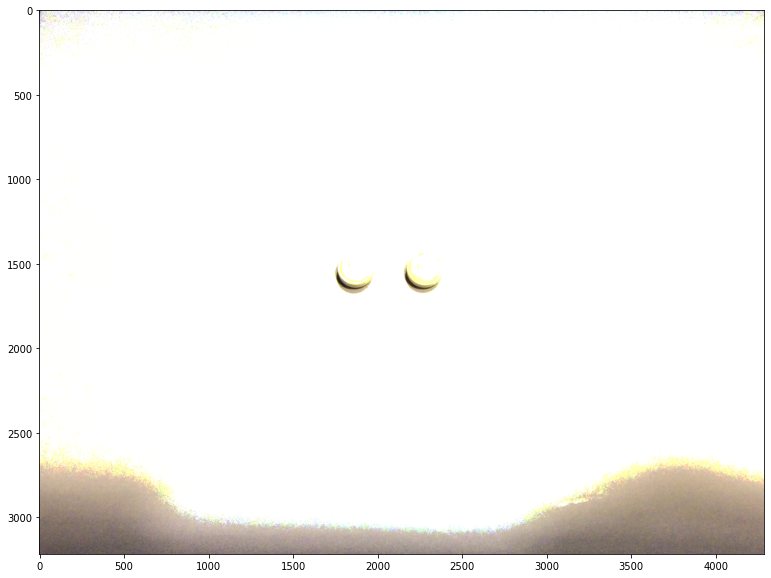

In [11]:
img = img_as_float(image)
idx = img[:,:,0] > bg_red[0,0,0]
img[idx,0] = 1
idx = img[:,:,1] > bg_green[0,0,1]
img[idx,1] = 1
idx = img[:,:,2] > bg_blue[0,0,2]
img[idx,2] = 1

plt.figure(figsize=(18,10))
plt.imshow(img)

/home/mirko/Envs/pill-classification/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # This is added back by InteractiveShellApp.init_path()


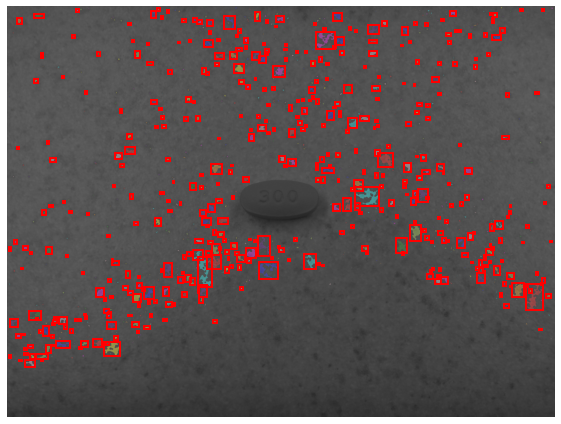

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, disk
from skimage.color import label2rgb, rgb2gray

image = rgb2gray(image)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image <= thresh, disk(6))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()